# Showcasing CLIP Label Ambiguity Limitation


## Preliminaries


### Install dependencies for loading the CLIP model and plotting images


In [ ]:
!pip install torch
!pip install transformers
!pip install matplotlib

### Load and plot images


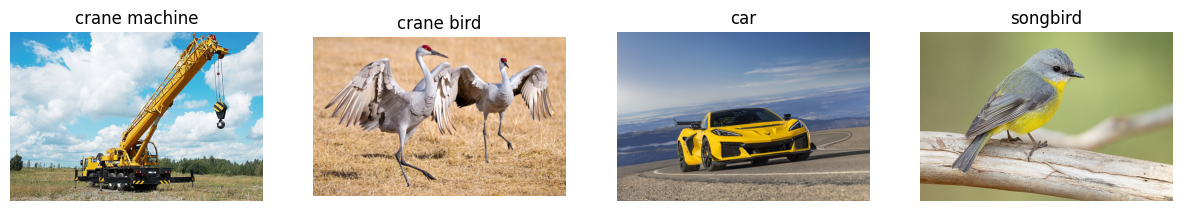

In [1]:
import os
from PIL import Image

import matplotlib.pyplot as plt


# take all images from the pics directory
images_paths = os.listdir("pics")
images = [Image.open(image_path) for image_path in images_paths]

# plot images
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, (image, ax) in enumerate(zip(images, axs)):
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(images_paths[i].split(
        "/")[-1].split(".")[0].replace("_", " "))
plt.show()

## Using The CLIP Model


In [2]:
from transformers import CLIPProcessor, CLIPModel
import numpy as np

# CLIP models: https://huggingface.co/docs/transformers/model_doc/clip
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


def pred_plot(labels: list[str]):
    inputs = processor(text=labels, images=images,
                       return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1).detach().numpy()

    # Plot images with histograms
    fig, axs = plt.subplots(len(images), 2, figsize=(
        10, 15), gridspec_kw={'width_ratios': [2, 1]})
    for i, (image, prob, ax_img, ax_hist) in enumerate(zip(images, probs, axs[:, 0], axs[:, 1])):
        # Sort labels and probabilities
        # Sort probabilities in ascending order
        sorted_indices = np.argsort(prob)
        sorted_labels = [labels[j] for j in sorted_indices]
        sorted_probs = prob[sorted_indices]

        # Show the image
        ax_img.imshow(image)
        ax_img.axis("off")
        ax_img.set_title(images_paths[i].split(
            "/")[-1].split(".")[0].replace("_", " "))

        # Show the histogram
        ax_hist.barh(sorted_labels, sorted_probs)
        ax_hist.set_xlim(0, 1)
        ax_hist.set_yticks(range(len(sorted_labels)))
        ax_hist.set_yticklabels(sorted_labels)
        ax_hist.set_xlabel("Probability")

    plt.tight_layout()
    plt.show()

/Users/dani/Documents/work/Projects/security-flan/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


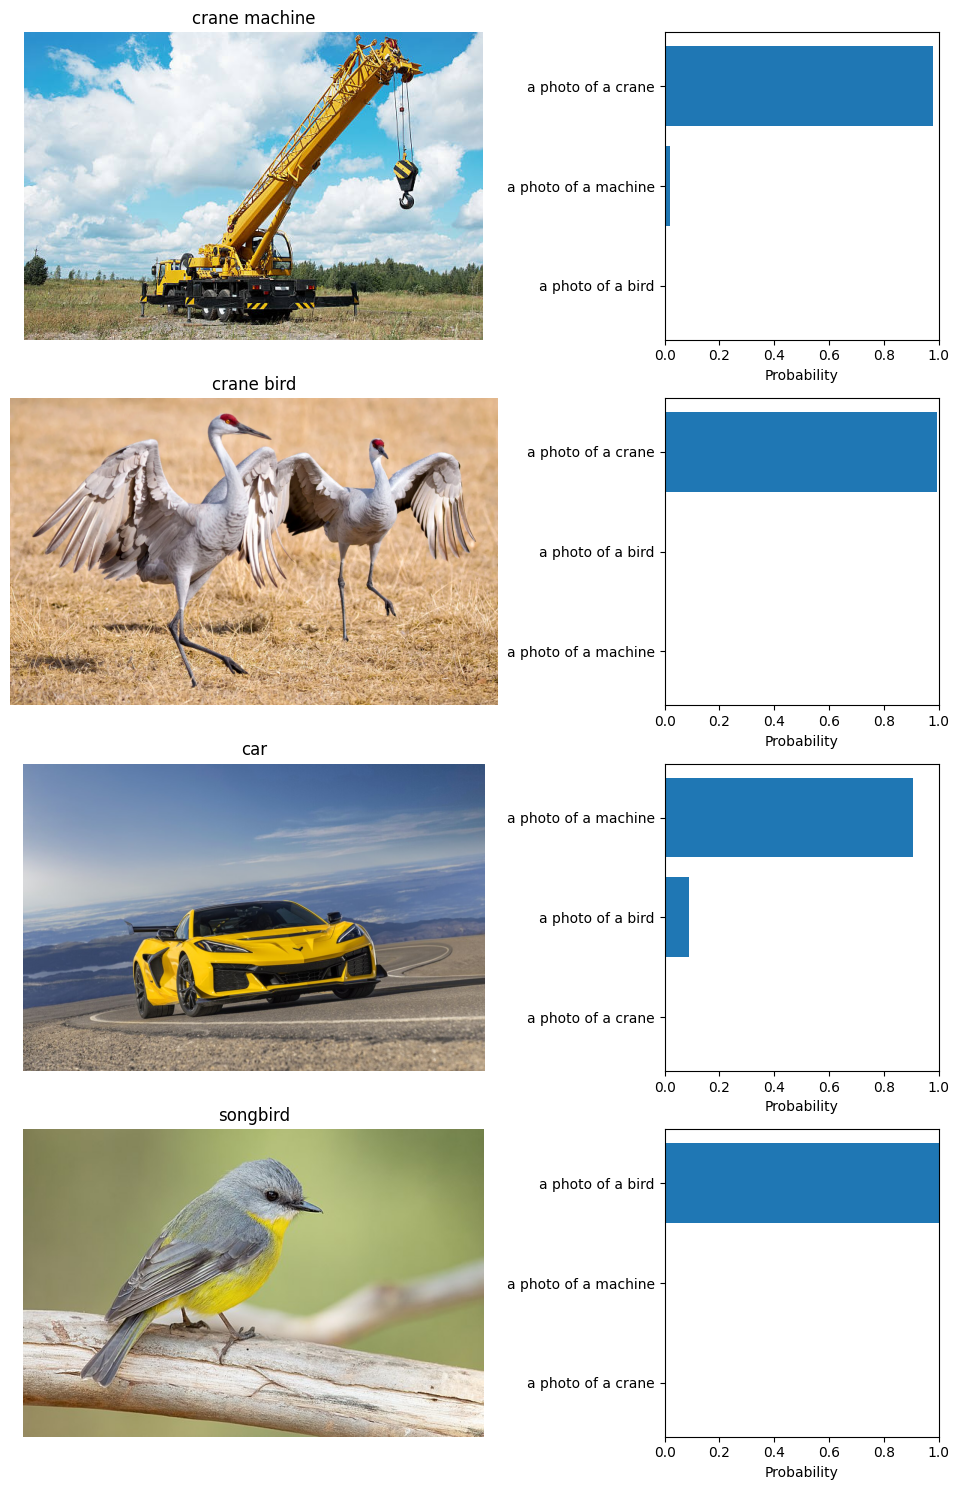

In [3]:
pred_plot(["a photo of a crane", "a photo of a machine", "a photo of a bird"])

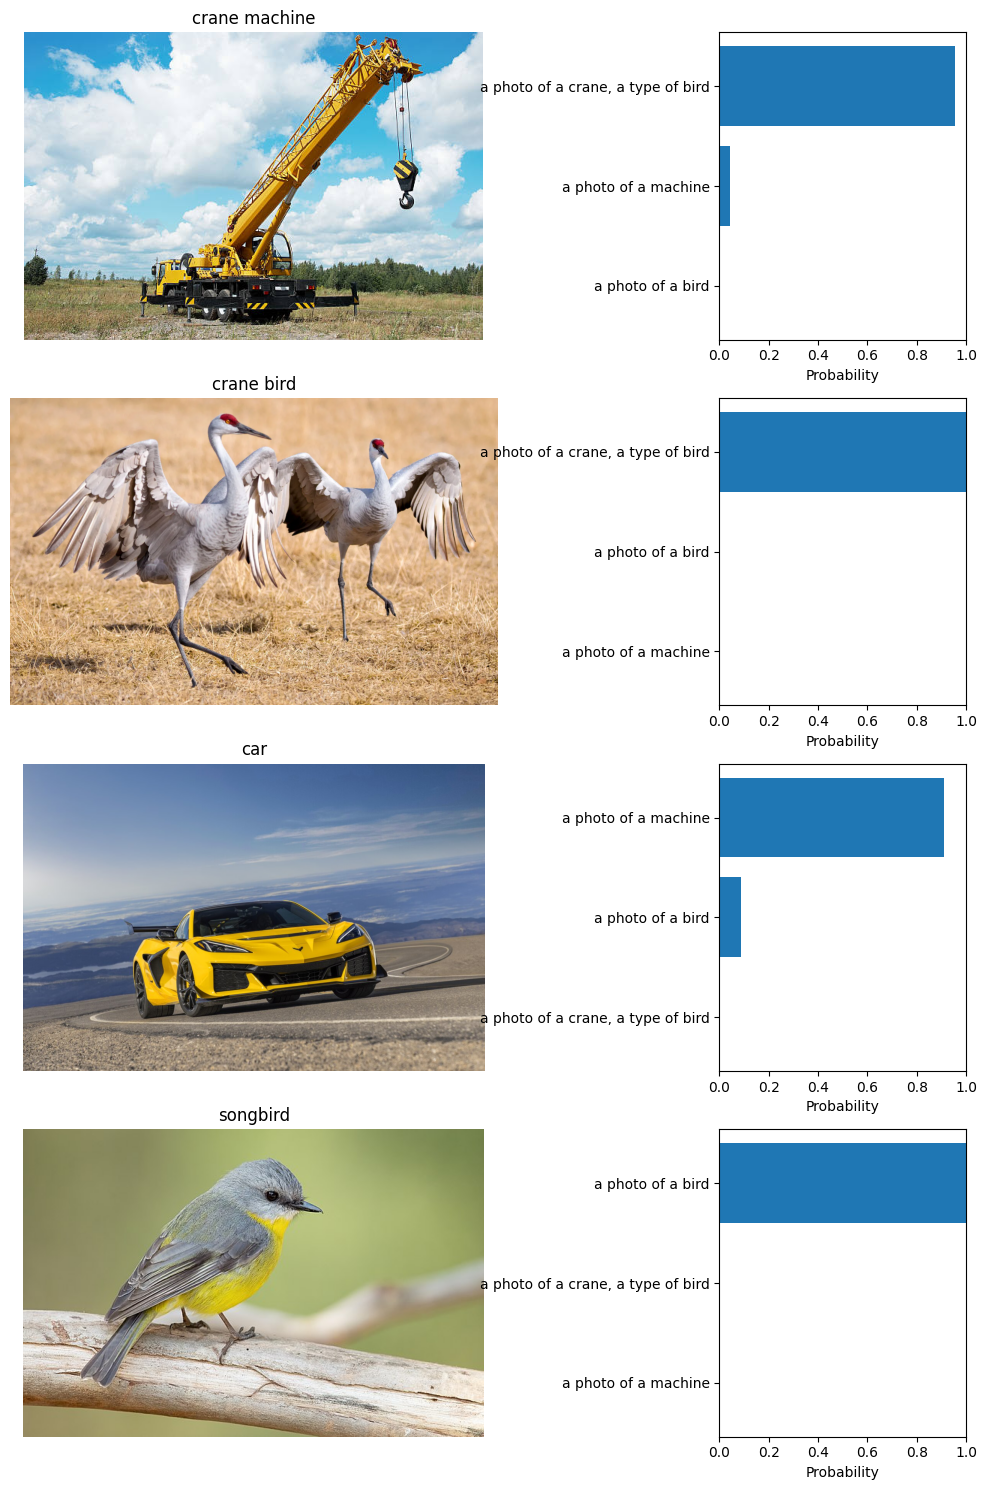

In [4]:
pred_plot(["a photo of a crane, a type of bird",
          "a photo of a machine", "a photo of a bird"])

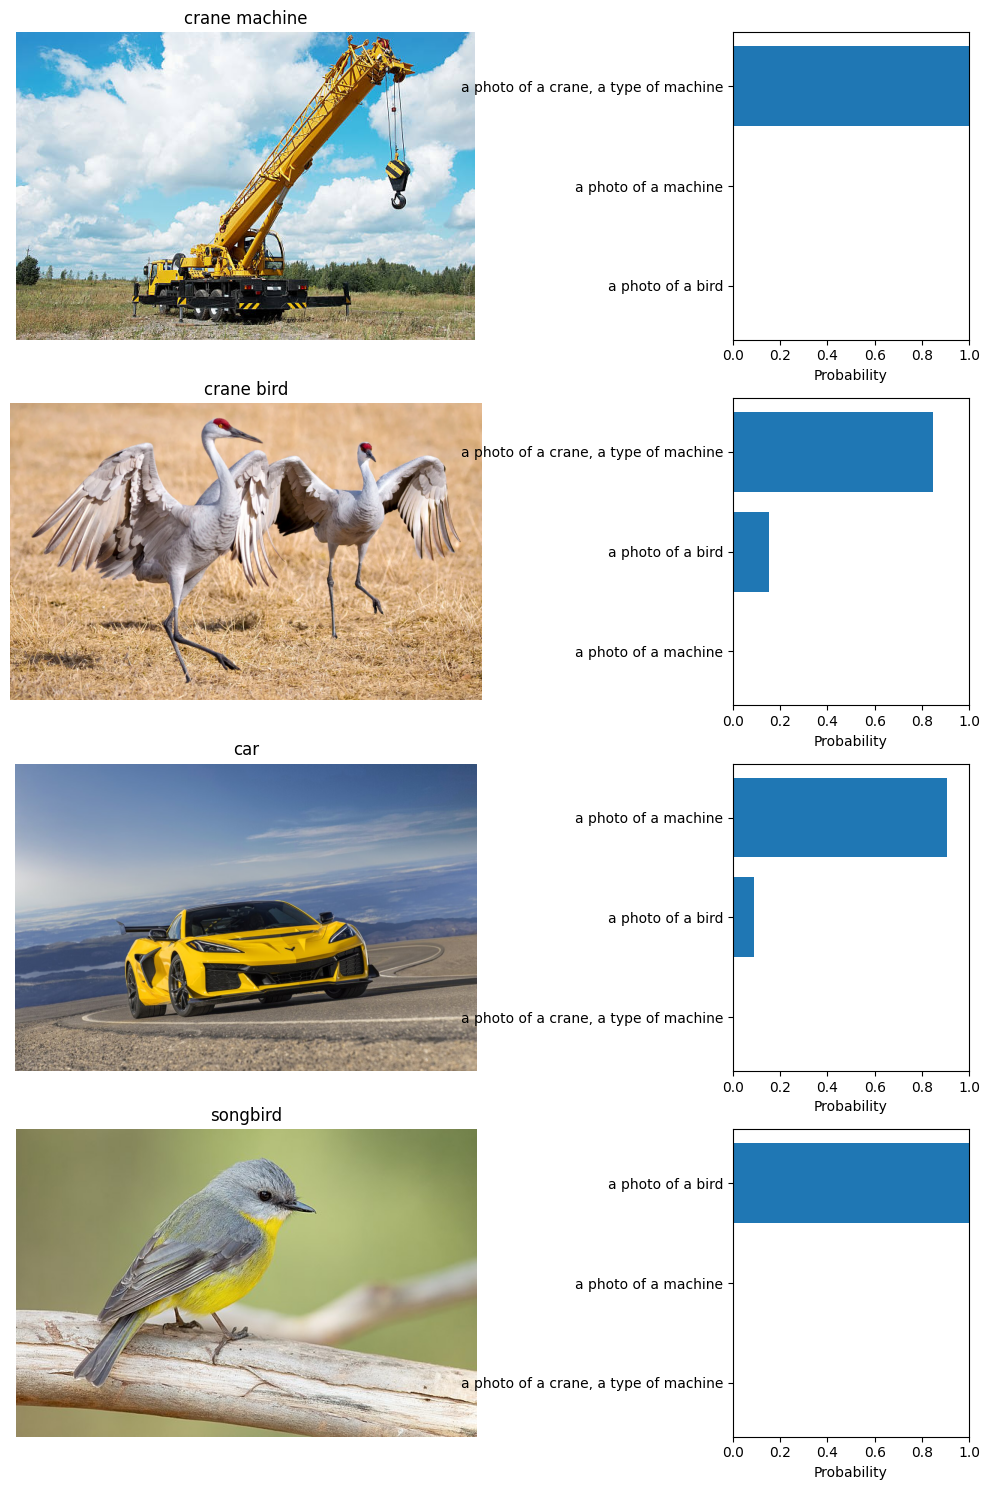

In [5]:
pred_plot(["a photo of a crane, a type of machine",
          "a photo of a machine", "a photo of a bird"])

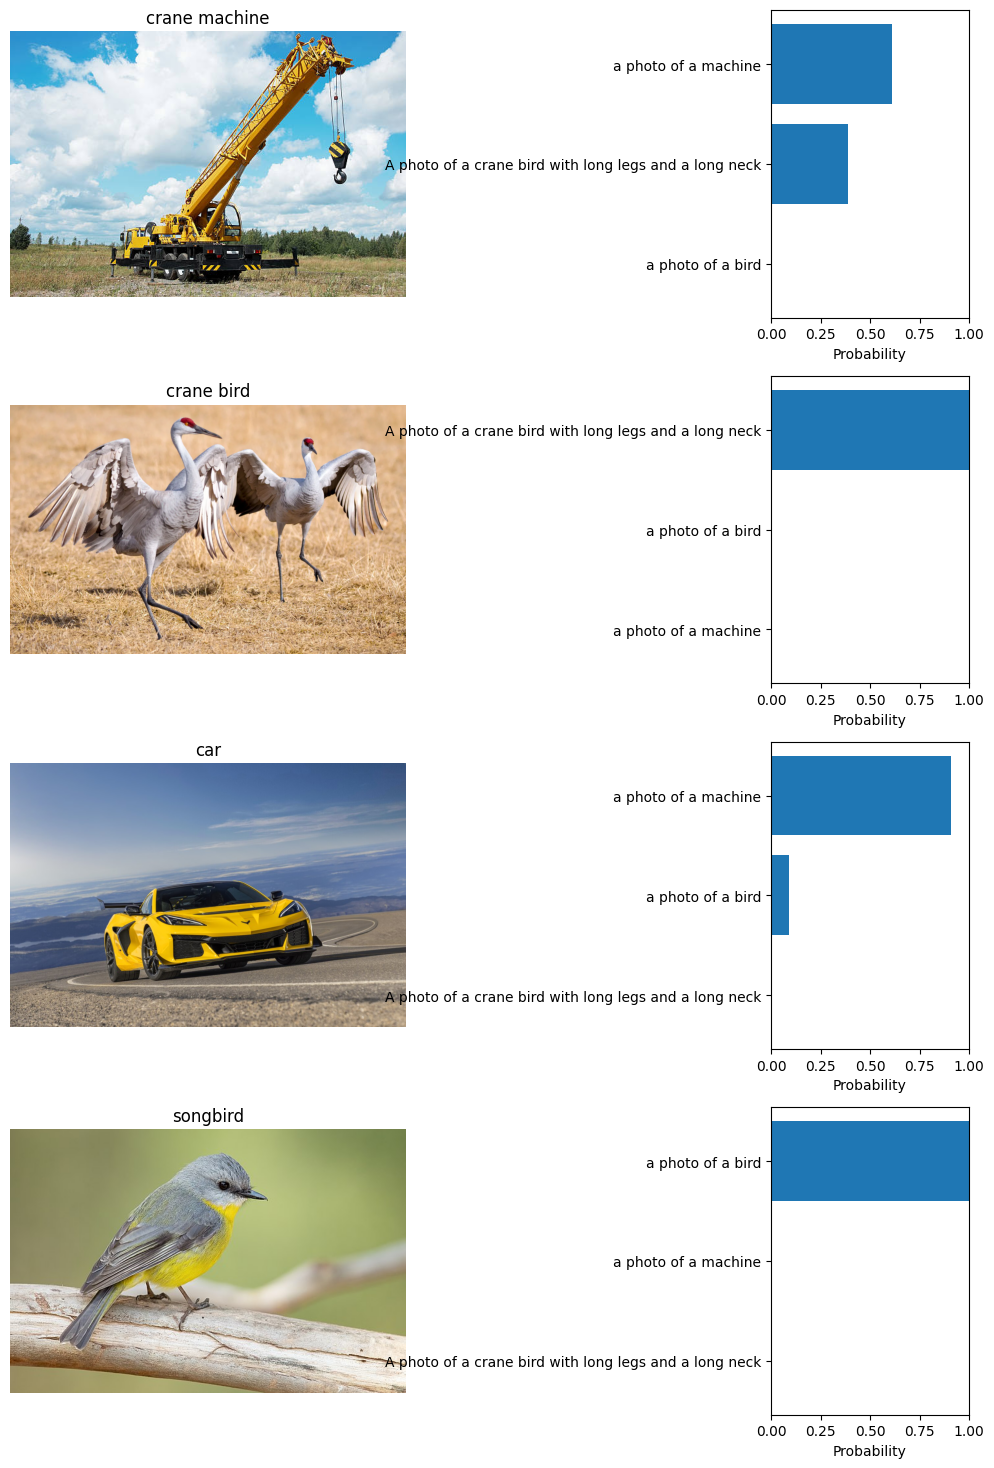

In [6]:
pred_plot(["A photo of a crane bird with long legs and a long neck",
          "a photo of a machine", "a photo of a bird"])